In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,NaN,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,NaN,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,NaN,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,NaN,1.04,NaN,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120.0,NaN,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,NaN,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	8
float64		column 3	14
float64		column 4	14
float64		column 5	15
float64		column 6	7
float64		column 7	8
float64		column 8	21
float64		column 9	0
float64		column 10	7
float64		column 11	7
float64		column 12	7
int64		column 13	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,178.000000,170.000000,164.000000,164.000000,163.000000,171.000000,170.000000,157.000000,178.000000,171.000000,171.000000,171.000000,178.000000
mean,13.000618,2.330412,2.367134,19.486585,99.509202,2.311287,1.993235,0.356943,1.590899,5.055848,0.954655,2.613918,746.893258
std,0.811827,1.124516,0.277254,3.136340,14.051215,0.623025,0.971113,0.120914,0.572359,2.321371,0.220636,0.704343,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.592500,2.217500,17.350000,88.000000,1.785000,1.125000,0.260000,1.250000,3.230000,0.790000,1.980000,500.500000
50%,13.050000,1.845000,2.360000,19.500000,98.000000,2.400000,2.100000,0.340000,1.555000,4.700000,0.960000,2.780000,673.500000
75%,13.677500,3.082500,2.560000,21.500000,107.000000,2.800000,2.787500,0.430000,1.950000,6.165000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,28.500000,162.000000,3.880000,3.930000,0.660000,3.580000,13.000000,1.450000,4.000000,1680.000000


<AxesSubplot:>

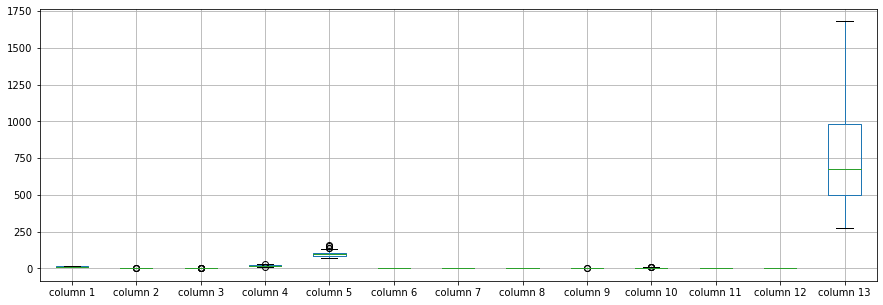

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.000618
column 2       2.330412
column 3       2.367134
column 4      19.486585
column 5      99.509202
column 6       2.311287
column 7       1.993235
column 8       0.356943
column 9       1.590899
column 10      5.055848
column 11      0.954655
column 12      2.613918
column 13    746.893258
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.098444,0.204356,-0.243593,0.280026,0.294448,0.274606,-0.162752,0.136698,0.540250,-0.015388,0.087573,0.643720
column 2,0.098444,1.000000,0.177708,0.348987,-0.043887,-0.369114,-0.416618,0.252194,-0.220510,0.203982,-0.555318,-0.372241,-0.192054
column 3,0.204356,0.177708,1.000000,0.452629,0.289923,0.125847,0.051144,0.200396,-0.003261,0.261016,-0.108725,-0.014410,0.218375
column 4,-0.243593,0.348987,0.452629,1.000000,-0.081109,-0.326660,-0.440082,0.365077,-0.182376,0.055450,-0.343149,-0.305231,-0.458615
column 5,0.280026,-0.043887,0.289923,-0.081109,1.000000,0.236790,0.199206,-0.220302,0.228084,0.236693,0.082277,0.029675,0.392631
column 6,0.294448,-0.369114,0.125847,-0.326660,0.236790,1.000000,0.864964,-0.437561,0.602409,-0.028564,0.436328,0.705745,0.501890
column 7,0.274606,-0.416618,0.051144,-0.440082,0.199206,0.864964,1.000000,-0.543899,0.676162,-0.176020,0.582397,0.793243,0.517861
column 8,-0.162752,0.252194,0.200396,0.365077,-0.220302,-0.437561,-0.543899,1.000000,-0.363076,0.141646,-0.301018,-0.479110,-0.272206
column 9,0.136698,-0.220510,-0.003261,-0.182376,0.228084,0.602409,0.676162,-0.363076,1.000000,-0.031308,0.289173,0.525292,0.330417
column 10,0.540250,0.203982,0.261016,0.055450,0.236693,-0.028564,-0.176020,0.141646,-0.031308,1.000000,-0.526669,-0.405252,0.311640


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+77,13+77+77,13+77+77,13+77+77+77+77,13+77+77+77+77+77,13+77+77+77+77+77+77,13+77+77+77+77+77,13+77+77+77+77,13+77+77+77,13+77+77,13+77,13], vae_layer = False, seed = 770)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 950.2467595880681
Epoch: 1 , loss: 941.4550670276989
Epoch: 2 , loss: 944.8699229847301
Epoch: 3 , loss: 953.4997669566761
Epoch: 4 , loss: 946.7953879616477
Epoch: 5 , loss: 945.9860174005681
Epoch: 6 , loss: 950.3507135564631
Epoch: 7 , loss: 950.056318803267
Epoch: 8 , loss: 952.6640957919034
Epoch: 9 , loss: 947.4421164772727
Epoch: 10 , loss: 952.0420920632102
Epoch: 11 , loss: 949.7584394975142
Epoch: 12 , loss: 950.8713267933239
Epoch: 13 , loss: 949.8143088600852
Epoch: 14 , loss: 943.7342751242898
Epoch: 15 , loss: 947.2072420987216
Epoch: 16 , loss: 947.9833651455966
Epoch: 17 , loss: 939.2392522638494
Epoch: 18 , loss: 937.4858453924006
Epoch: 19 , loss: 936.113075949929
Epoch: 20 , loss: 937.005781693892
Epoch: 21 , loss: 935.391884543679
Epoch: 22 , loss: 933.222695090554
Epoch: 23 , loss: 928.9137129350142
Epoch: 24 , loss: 927.3399824662642
Epoch: 25 , loss: 920.6081376509233
Epoch: 26 ,

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.930000
column 2       0.203949
column 3       2.650000
column 4      18.600000
column 5     102.000000
column 6       2.410000
column 7       2.410000
column 8       0.250000
column 9       1.980000
column 10      4.500000
column 11      1.030000
column 12      3.520000
column 13    770.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.000000,0.0,0.0,-119.148024,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0
1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0
2,0.0,0.000000,0.0,0.0,0.000000,0.000000,-2.773917,0.0,0.0,0.000000,0.0,0.000000,0
3,0.0,-0.736016,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0
4,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,-2.946675,0.0,-2.107198,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0
174,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0
175,0.0,0.000000,0.0,0.0,0.000000,-0.323459,0.000000,0.0,0.0,0.000000,0.0,0.000000,0
176,0.0,0.000000,0.0,0.0,-104.931960,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(355.5205824131889, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.03262231940220145

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.710000,2.43,15.6,7.851976,2.800000,3.060000,0.28,2.29,5.640000,1.04,3.920000,1065
1,13.20,1.780000,2.14,11.2,100.000000,2.650000,2.760000,0.26,1.28,4.380000,1.05,3.400000,1050
2,13.16,2.360000,2.67,18.6,101.000000,2.800000,0.466083,0.30,2.81,5.680000,1.03,3.170000,1185
3,14.37,1.213984,2.50,16.8,113.000000,3.850000,3.490000,0.24,2.18,7.800000,0.86,3.450000,1480
4,13.24,2.590000,2.87,21.0,118.000000,2.800000,2.690000,0.39,1.82,1.373325,1.04,0.822802,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.650000,2.45,20.5,95.000000,1.680000,0.610000,0.52,1.06,7.700000,0.64,1.740000,740
174,13.40,3.910000,2.48,23.0,102.000000,1.800000,0.750000,0.43,1.41,7.300000,0.70,1.560000,750
175,13.27,4.280000,2.26,20.0,120.000000,1.266541,0.690000,0.43,1.35,10.200000,0.59,1.560000,835
176,13.17,2.590000,2.37,20.0,15.068040,1.650000,0.680000,0.53,1.46,9.300000,0.60,1.620000,840


In [20]:
imputations[-1].to_excel("Wine_NG_5(imp).xlsx", index=False, header=False)